# Project 1.) First Cloud Function

### Description : Post a cloud function that takes in a string of numbers and returns a json file that contains the the sum of all of the single digit numbers

#### Example : input ="12345"
#### output = 1+2+3+4+5 = 15
#### returns({"answer":15})

In [9]:
import json

def sum_single_digits(request):
    input_str = request.get_data().decode()
    digits_sum = 0
    for digit in input_str:
        if digit.isdigit():
            digits_sum += int(digit)
    response = {"answer": digits_sum}
    return json.dumps(response)

In [2]:
import session_info
session_info.show()

## 1.b.) Query your cloud function using requests for example input "012937", "2" and "9999999999999"

In [57]:
import requests

In [18]:
url='https://us-central1-keen-hope-385817.cloudfunctions.net/sum_single_digits'

In [24]:
r1 = requests.post(url,
                 "012937")

In [25]:
r1.text

'{"answer": 22}'

In [26]:
r2 = requests.post(url,
                 "2")

In [27]:
r2.text

'{"answer": 2}'

In [28]:
r3 = requests.post(url,
                 "9999999999999")

In [29]:
r3.text

'{"answer": 117}'

# Project 2.) Automated Webscraping

### Description : Find a website that is scrapable with Beautiful soup that updates with some frequency. Build a cloud function to programatically scrape the useful content

In [62]:
bucket_name='econ446'

In [63]:
from google.cloud import storage
import os
from io import StringIO
import pandas as pd

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "Gcredentials.json"

In [64]:
client = storage.Client()

In [65]:
bucket=client.get_bucket(bucket_name)

In [66]:
df=pd.DataFrame()

In [67]:
df.to_csv('localdata.csv')

In [68]:
blob=bucket.blob('webscrape/yelp.csv')

In [69]:
blob.upload_from_filename('localdata.csv')

In [70]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from datetime import date

In [77]:
def yelp():
    headers = {
        'User-Agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9 "}
    URL = "https://www.yelp.com/search?find_desc=Restaurants&find_loc=Los+Angeles%2C+CA"
    page = requests.get(URL, headers = headers)
    soup = BeautifulSoup(page.content, "html.parser")
    names = soup.findAll("a",
                     attrs = {"class":"css-19v1rkv"})
    clean_n = [n.text for n in names]
    clean_n = clean_n[4:-1]
    ratings = soup.findAll("div", 
                           {"class": "five-stars__09f24__mBKym five-stars--regular__09f24__DgBNj display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY"})
    clean_r = [r.get('aria-label') for r in ratings]
    clean_r = clean_r
    
    df=pd.DataFrame([[date.today()]*len(clean_n),clean_n, clean_r]).transpose()
    df.columns=['Date','Name','Rating']
    
    
    return(df)


In [79]:
headers = {
    'User-Agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9 "}
URL = "https://www.yelp.com/search?find_desc=Restaurants&find_loc=Los+Angeles%2C+CA"
page = requests.get(URL, headers = headers)
soup = BeautifulSoup(page.content, "html.parser")
soup

<!DOCTYPE html>

<html lang="en-US" prefix="og: http://ogp.me/ns#" style="margin: 0;padding: 0; border: 0; font-size: 100%; font: inherit; vertical-align: baseline;"><head><script>document.documentElement.className=document.documentElement.className.replace(/�no-js�/,"js");</script><meta content="en-US" http-equiv="Content-Language"/><meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/><link content="#FF1A1A" href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/b2bb2fb0ec9c/assets/img/logos/yelp_burst.svg" rel="mask-icon" sizes="any"/><link href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/dcfe403147fc/assets/img/logos/favicon.ico" rel="shortcut icon"/><script> window.ga=window.ga||function(){(ga.q=ga.q||[]).push(arguments)};ga.l=+new Date;window.ygaPageStartTime=new Date().getTime();</script><script>
            window.yelp = window.yelp || {};
            window.yelp.cookieTypePreferencesHeader = '["ANALYTICS","FUNC

In [80]:
names = soup.findAll("a",
                     attrs = {"class":"css-19v1rkv"})
clean_n = [n.text for n in names]
clean_n

['Los Angeles, CA',
 'Restaurants',
 'Terminal 27',
 'The Buffalo Spot - Los Angeles',
 'etta',
 'Yahir',
 'Carasau',
 'Madre Oaxacan Restaurant and Mezcaleria',
 'Arth Bar & Kitchen',
 'Hermanito',
 'The Brixton',
 'Fifty One',
 'Chinchikurin - Sawtelle',
 'Simonette',
 'Taste of India - Sherman Oaks']

In [81]:
ratings = soup.findAll("div", 
                        {"class": "five-stars__09f24__mBKym five-stars--regular__09f24__DgBNj display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY"})
clean_r = [r.get('aria-label') for r in ratings]
clean_r

['4.3 star rating',
 '4.8 star rating',
 '4.4 star rating',
 '4 star rating',
 '4.3 star rating',
 '4.4 star rating',
 '4.3 star rating',
 '3.8 star rating',
 '4.3 star rating',
 '4.2 star rating',
 '4.1 star rating']

In [78]:
ye=yelp()
ye

,Date,Name,Rating
0,2023-05-28,GRANVILLE,4.4 star rating
1,2023-05-28,etta,4.3 star rating
2,2023-05-28,Little Fatty,4 star rating
3,2023-05-28,Piccalilli,4.4 star rating
4,2023-05-28,Lonzo’s Restaurant,4.4 star rating
5,2023-05-28,Carasau,4.4 star rating
6,2023-05-28,Yahir,4.8 star rating
7,2023-05-28,The Brixton,4.3 star rating
8,2023-05-28,Madre Oaxacan Restaurant and Mezcaleria,4 star rating
9,2023-05-28,Arth Bar & Kitchen,4.3 star rating


In [356]:
def download_data():
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "Gcredentials.json"
    client = storage.Client()
    bucket_name='econ446'
    bucket=client.get_bucket(bucket_name)
    
    blob=bucket.blob('webscrape/yelp.csv')
    csv_data=blob.download_as_text()
    df=pd.read_csv(StringIO(csv_data))
    
    return(df)

In [94]:
def post_data(request):
    old_data=download_data()
    new_data=yelp()
    df=pd.concat([old_data,new_data])
    
    csv_data=df.to_csv(index=False)
    
    client = storage.Client()
    bucket_name='econ446'
    bucket=client.get_bucket(bucket_name)
    blob=bucket.blob('webscrape/yelp.csv')
    
    blob.upload_from_string(csv_data)
    return({'status':200,
           'length_data':len(df)})

## 2.b.) Query your stored files

In [413]:
url='https://us-central1-keen-hope-385817.cloudfunctions.net/yelp'
r = requests.post(url)

In [434]:
client = storage.Client()
bucket=client.get_bucket(bucket_name)
blob=bucket.blob('webscrape/yelp.csv')
blob.download_to_filename('yelpdata.csv')
df=pd.read_csv('yelpdata.csv').iloc[:,1:]

In [435]:
df

,Date,Name,Rating
0,2023-05-15,GRANVILLE,4.5 star rating
1,2023-05-15,etta,4.5 star rating
2,2023-05-15,Little Fatty,4 star rating
3,2023-05-15,Lonzo’s Restaurant,4.5 star rating
4,2023-05-15,Piccalilli,4.5 star rating
5,2023-05-15,Madre Oaxacan Restaurant and Mezcaleria,4 star rating
6,2023-05-15,Carasau,4.5 star rating
7,2023-05-15,The Brixton,4.5 star rating
8,2023-05-15,Hermanito,4.5 star rating
9,2023-05-15,Venice Noodles,4.5 star rating


## 2.c.) State how this could be useful in a business setting

I built a google cloud function that scrapes the top 10 restaurants of LA and their ratings from yelp. And I made this function to run every monday. 
This could be very useful in a business setting for a number of reasons. For example, if the business is in the food industry, they could use this information to keep track of their competitors and stay up-to-date on the latest trends in their local market. They could analyze the data from Yelp to see what types of food are popular, what types of restaurants are getting the most positive reviews, and what their competitors are doing well.
Furthermore, this function could also be useful for businesses that are looking to improve their own online presence. By analyzing the reviews and ratings of top restaurants in their local area, businesses could gain valuable insights into what their customers are looking for in terms of food and service. They could also identify areas where they can improve their own customer experience and online reputation.
By scheduling this function to run automatically on a weekly basis, businesses can receive regular updates on the top restaurants and ratings in their area without having to spend time manually gathering and analyzing this information. This can save time and resources and allow businesses to focus on other important tasks.

# Project 3.) 

### Description : Build some machine learning model using scikit learn and make it queriable using cloud functions

In [2]:
import io
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [7]:
data2=pd.read_csv('carseats.csv').iloc[:,1:]

In [8]:
data2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [9]:
m=data2.Sales.mean()

In [10]:
data2.loc[data2[data2.Sales <= m].index.tolist(),'sales2'] = 0
data2.loc[data2[data2.Sales > m].index.tolist(),'sales2'] = 1

In [11]:
from sklearn.model_selection import train_test_split

data2_other, data2_test = train_test_split(
  data2, 
  train_size = 0.75,
  random_state = 425, # seed
    stratify = data2.sales2
  )
data2_test.shape

(100, 12)

In [12]:
num_features = ['Income','Advertising','Population','Price','Age']
cat_features = ['Urban','US']
features = np.concatenate([num_features, cat_features])
# Non-test X and y
X_other = data2_other[features]
y_other = data2_other.sales2
# Test X and y
X_test = data2_test[features]
y_test = data2_test.sales2

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Transformer for categorical variables
categorical_tf = Pipeline(steps = [
  ("cat_impute", SimpleImputer(strategy = 'most_frequent')),
  ("encoder", OneHotEncoder())
])

# Transformer for continuous variables
numeric_tf = Pipeline(steps = [
  ("num_impute", SimpleImputer(strategy = 'mean')),
])

# Column transformer
col_tf = ColumnTransformer(transformers = [
  ('num', numeric_tf, num_features),
  ('cat', categorical_tf, cat_features)
])

<Figure size 432x288 with 0 Axes>

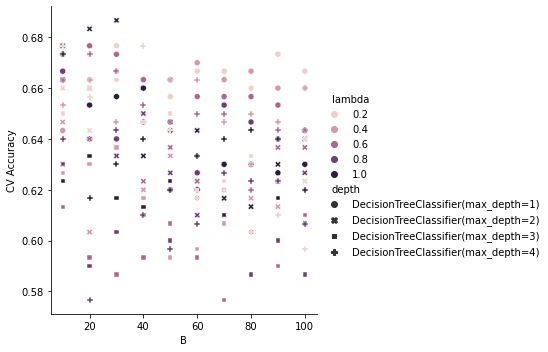

In [14]:
#boosting method

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

bst_mod = AdaBoostClassifier(
  base_estimator = DecisionTreeClassifier(max_depth = 3),
  # Number of trees (to be tuned)
  n_estimators = 50, 
  # Learning rate (to be tuned)
  learning_rate = 1.0,
  random_state = 425
  )

from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [
  ("col_tf", col_tf),
  ("model", bst_mod)
  ])

d_grid = [
  DecisionTreeClassifier(max_depth = 1),
  DecisionTreeClassifier(max_depth = 2),
  DecisionTreeClassifier(max_depth = 3),
  DecisionTreeClassifier(max_depth = 4)
  ]
B_grid = np.linspace(10, 100, 10).astype(int)
lambda_grid = [0.2, 0.4, 0.6, 0.8, 1.0]
tuned_parameters = {
  "model__base_estimator": d_grid,
  "model__n_estimators": B_grid,
  "model__learning_rate": lambda_grid
  }

# Set up CV
n_folds = 5
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "accuracy",
  # Refit the best model on the whole data set
  refit = True
  )

search.fit(X_other, y_other)

cv_res = pd.DataFrame({
  "B": np.array(search.cv_results_["param_model__n_estimators"]),
  "acc": search.cv_results_["mean_test_score"],
  "lambda": search.cv_results_["param_model__learning_rate"],
  "depth": search.cv_results_["param_model__base_estimator"],
  })

plt.figure()
sns.relplot(
  # kind = "line",
  data = cv_res,
  x = "B",
  y = "acc",
  hue = "lambda",
  style = "depth"
  ).set(
    xlabel = "B",
    ylabel = "CV Accuracy"
);
plt.show()

In [15]:
search.best_score_

0.6866666666666668

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(
  y_test,
  search.best_estimator_.predict(X_test)
  )

0.71

In [17]:
joblib.dump(search.best_estimator_, 'model.sav')

['model.sav']

In [18]:
client = storage.Client()
bucket_name='econ446'
bucket=client.get_bucket(bucket_name)
blob=bucket.blob('machinelearning/model.sav')
    
blob.upload_from_filename('model.sav')

In [20]:
from io import BytesIO

In [22]:
def load_scikit_model(file_name):
    bucket_name='econ446'
    source_blob='machinelearning/'+file_name
    
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "Gcredentials.json"
    client = storage.Client()
    
    bucket=client.get_bucket(bucket_name)
    blob=bucket.blob(source_blob)
    
    model_data=blob.download_as_bytes()
    model=joblib.load(BytesIO(model_data))
    return(model)
    

In [23]:
model=load_scikit_model('model.sav')

In [25]:
from urllib.parse import parse_qs

In [27]:
#google cloud function

def predict(request):
    model=load_scikit_model('model.sav')
    print(request.get_data().decode())
    
    query_string=request.get_data().decode()
    dictionary=parse_qs(query_string)

    for key, value in dictionary.items():
        globals()[key]=value
        
    x=pd.DataFrame()
    x['Income']=[int(Income[0])]
    x['Advertising']=[int(Advertising[0])]
    x['Population']=[int(Population[0])]
    x['Price']=[int(Price[0])]
    x['Age']=[int(Age[0])]
    x['Urban']=[Urban[0]]
    x['US']=[US[0]]

    prediction=model.predict(x)[0]
    
    if prediction==0:
        pred='Below Average'
    else:
        pred='Above Average'
    
    return({'Sales prediction':pred})

In [42]:
import session_info
session_info.show(excludes=['google3'])

In [83]:
url='https://us-central1-keen-hope-385817.cloudfunctions.net/carseats_sale'

In [84]:
data={'Income':1,
        'Advertising':1,
        'Population':2,
        'Price':56,
        'Age':80,
        'Urban':'Yes',
        'US':'Yes'}

In [87]:
r = requests.post(url,
                   data)

In [100]:
r.text

'{"Sales prediction":"Below Average"}\n'

## 3.b.) Make a user-friendly input page that takes the inputs to your ML model and displays the output. Post to a sharable webpage. Link below

In [60]:
# I made a googlecolab with the code to input and get the output of 
# the model prediction. This colab is sharable to everyone.
link='''https://colab.research.google.com/drive/1iIfII-R3IBaaQxVM3
    0o7lQ2LKMon1cva#scrollTo=99e472b6'''

In [42]:
import ipywidgets as widgets
from IPython.display import display

In [55]:
layout = widgets.Layout(width='600px')

text_in=widgets.Text(value='',description='Income',
                     placeholder='Community Income Level (in thousands dollars):',
                     disabled=False,layout=layout)
text_ad=widgets.Text(value='',description='Advertising',
                     placeholder='Local advertising budget for company at each location (in thousands of dollars):',
                     disabled=False,layout=layout)
text_po=widgets.Text(value='',description='Population',
                     placeholder='Population size in region (in thousands):',
                     disabled=False,layout=layout)
text_pr=widgets.Text(value='',description='Price',
                     placeholder='Price company charges for car seats at each site:',
                     disabled=False,layout=layout)
text_ag=widgets.Text(value='',description='Age',
                     placeholder='Average age of the local population:',
                     disabled=False,layout=layout)
text_ur=widgets.Text(value='',description='Urban',
                     placeholder='If the store is in urban area: input Yes; If the store is in rural area: input No:',
                     disabled=False,layout=layout)
text_us=widgets.Text(value='',description='US',
                     placeholder='If the store is in the US: input Yes; If the store is not in the US: input No:',
                     disabled=False,layout=layout)

button=widgets.Button(description='Click')

def my_function(button):
    data={'Income':text_in.value,
        'Advertising':text_ad.value,
        'Population':text_po.value,
        'Price':text_pr.value,
        'Age':text_ag.value,
        'Urban':text_ur.value,
        'US':text_us.value}
    url='https://us-central1-keen-hope-385817.cloudfunctions.net/carseats_sale'
    r = requests.post(url,
                   data)
    print('Sales Prediction:',r.json()['Sales prediction'])
    
button.on_click(my_function)

In [61]:
display(text_in)
display(text_ad)
display(text_po)
display(text_pr)
display(text_ag)
display(text_ur)
display(text_us)
display(button)

Text(value='12', description='Income', layout=Layout(width='600px'), placeholder='Community Income Level (in t…

Text(value='12', description='Advertising', layout=Layout(width='600px'), placeholder='Local advertising budge…

Text(value='12', description='Population', layout=Layout(width='600px'), placeholder='Population size in regio…

Text(value='12', description='Price', layout=Layout(width='600px'), placeholder='Price company charges for car…

Text(value='12', description='Age', layout=Layout(width='600px'), placeholder='Average age of the local popula…

Text(value='Yes', description='Urban', layout=Layout(width='600px'), placeholder='If the store is in urban are…

Text(value='No', description='US', layout=Layout(width='600px'), placeholder='If the store is in the US: input…

Button(description='Click', style=ButtonStyle())

Sales Prediction: Below Average


## 3.c.) Think of a company that would use the ML app you just built. What employees could use this app what would they use it for? Write a short paragraph.

The machine learning app I have built, which predicts the sales performance of a child car seat store, can be valuable for a company in the retail industry that specializes in selling child car seats. Several employees within this company could benefit from using this app. The sales team members can utilize the app to identify stores that are projected to have above-average sales, allowing them to allocate their resources and prioritize sales efforts accordingly. The marketing team can leverage the predictions to design targeted promotional campaigns for stores predicted to have below-average sales, aiming to boost their performance. Additionally, the store managers can use the app to proactively plan inventory management and staffing based on the predicted sales levels. Overall, this machine learning app empowers different employees within the company to make informed decisions and take proactive actions to optimize sales performance and drive business growth in the child car seat market.